# Introduction to Simple Linear Regression


## Learning Objectives and outcomes

- Introduction of linear regression in the simple setting.

- Basic assumptions of the model.

- Terminology - 'intercept', 'coefficient'.

- The Least Square method.
    
- Implement linear regression in sklearn.




In [21]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [7]:
data = pd.read_csv('data/kc_house_data.csv')
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062


In [12]:
df = data[['sqft_living', 'price']]

## scale price with 1000 so that it will be easier 

df['price'] = df.price/1000

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:
df.head(2)

,sqft_living,price
0,1180,221.9
1,2570,538.0


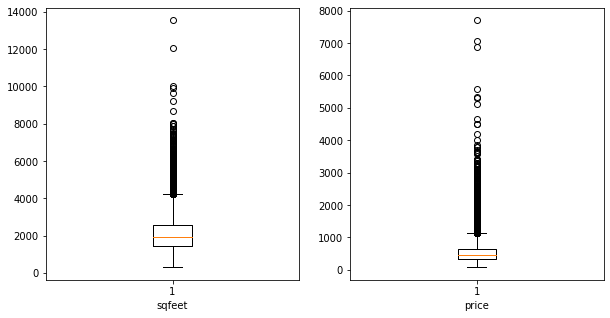

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

ax1.boxplot(df.sqft_living)
ax1.set_xlabel('sqfeet')
ax2.boxplot(df.price)
ax2.set_xlabel('price');

## visualize the 'price' and 'sqft_living' with boxplot

## watch  out the scales 


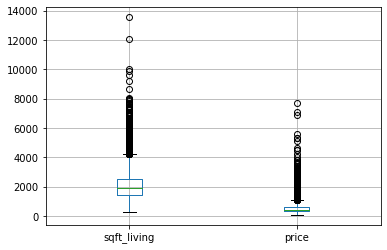

In [15]:
## use pandas for boxplots
df.boxplot()

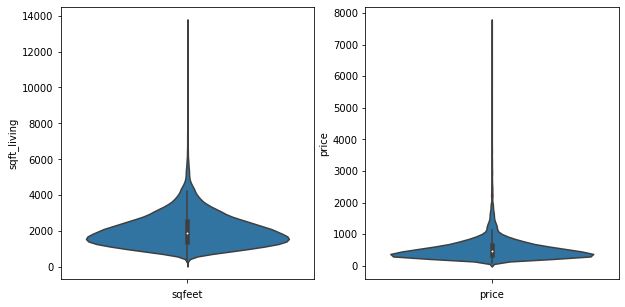

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Title for whole figure", fontsize=16)
sns.violinplot(y =df.sqft_living, ax = ax1)
ax1.set_xlabel('sqfeet')
sns.violinplot(y=df.price, ax=ax2)
ax2.set_xlabel('price');


In [28]:
df.info()
df.quantile(q=0.99)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
sqft_living    21613 non-null int64
price          21613 non-null float64
dtypes: float64(1), int64(1)
memory usage: 337.8 KB


sqft_living    4978.8
price          1964.4
Name: 0.99, dtype: float64

In [12]:
## AS you can see there are outliers - let's cut them from our dataset - use 0.98 as the quantile

In [30]:
idx = (df<df.quantile(q=0.98)).all(axis=1) #all aggregates along x axis the booleans
idx.head(3)

0    True
1    True
2    True
dtype: bool

In [32]:
df = df[idx]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20923 entries, 0 to 21612
Data columns (total 2 columns):
sqft_living    20923 non-null int64
price          20923 non-null float64
dtypes: float64(1), int64(1)
memory usage: 490.4 KB


### Assumptions

* Assume $\mbox{price} \approx \mbox{sqft_living}$  linearly.

* There is an initial value (baseline) of the price. 

* Data might not be exactly linear but the errors are random.

### Model  - Single Variable Case

$$ Y = b_{0} + b_{1}X + \epsilon$$
 
- $ b_{0}, b_{1}$ are called the intercept and coefficient of the linear model respectively. 

- $\epsilon$ is the error term.

- Given $\widehat{b_{0}}$ and $\widehat{b_{1}}$ we will make a prediction:

$$ \widehat{y_{i}} = \widehat{b_{0}} + \widehat{b_{1}} x_{i} $$

<img src="best_fit.png" cap="Transformed dataset"  width='300'/>



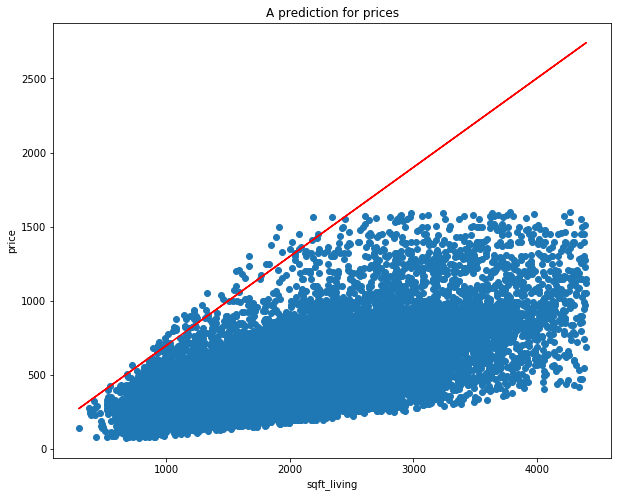

In [50]:
## play with this function what happens when you change b0_hat and b1_hat
X = data.sqft_living.values
y = data.price.values


def pred(b0_hat, b1_hat):
    y_pred = b0_hat + b1_hat * X
    
    
    data['predicted'] = y_pred
    
    # Data for plotting
    t = data.sqft_living.values
    s = data.predicted.values
    
    plt.figure(figsize= (10,8))

    

    plt.scatter(x= data.sqft_living, y= data.price)
    plt.plot(t, s, c= 'r')

    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.title('A prediction for prices')

    plt.show()
    return 

pred(100, 0.6)


### What do we mean by 'best fitting line'? Least Squares

<a name="least_squares">
</a>

__Q: How to find 'best' line?__


<img src="errors.png" cap="Transformed dataset"  width='500'/>



* Recall that we know actual values $y$ for the prices and for any coefficients $b_{0}, b_{1}$ we can make a prediction $\widehat{y}$. 

* Error for each prediction $e_{i} = y_{i} - \widehat{y_{i}}$



### Residual sum of squares


$$RSS = e_{1}^{2} + e_{2}^{2} + \cdots + e_{n}^{2}$$

* Wait a minute! Why do we get the squares?


The least square method minimizes the RSS.

* Good news: The least square can be calculated exactly because it has a closed form:

$$ \mbox{RSS} = (y_1 - \widehat{b_{0}} -\widehat{b_{1}}x_{1} )^{2} + (y_2 - \widehat{b_{0}} -\widehat{b_{1}}x_{2} )^{2} + \cdots + (y_n - \widehat{b_{0}} -\widehat{b_{1}}x_{n} )^{2}$$

* Bad news: It requires derivatives and is complicated to derive. But no worries, python will take care of this step for us.

$$ b_{1} = \dfrac{\sum^{n}_{i=1} (x_i - \bar{x})(y_{i}-\bar{y})}{\sum^{n}_{i=1} (x_i - \bar{x})^{2}}$$

and 

$$ b_0 = \bar{y} - b_{1}\bar{x} $$


Let's see linear regression in action.


<a name="sklearn">
</a>

## Linear Regression Using sklearn

In [46]:
# define X and y again here and reshape them
x = df.sqft_living.values
y = df.price.values


In [47]:
x.shape

(20923,)

In [52]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [54]:



# import LinearRegression from sklearn

from sklearn.linear_model import LinearRegression 

# Initialize the LinearRegression Object

linear = LinearRegression()


# Fit the model
linear.fit(x, y)

# print intercept and coef attributes of LinerRegression Object
print(linear.coef_)
print(linear.intercept_)


[[0.20386244]]
[91.32238849]


In [1]:
## call pred function to see the 'best fitting line'

lin.predict()

NameError: name 'pred' is not defined

## Further Reading <a name='further_reading'></a>

- https://newonlinecourses.science.psu.edu/stat501/node/252/

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

- https://lagunita.stanford.edu/assets/courseware/v1/e4f2f4823252ead8c1a68722e3415c28/c4x/HumanitiesSciences/StatLearning/asset/linear_regression-handout.pdf